# Linear Regression with one varibale:
This notebook implements the univariate linear regression algorithm using `Python-Numpy`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Getting Data Ready:

In [2]:
data=pd.read_csv("ex1data1.txt",header=None)
data=pd.DataFrame(data.values,columns=["Population","Price"])
data

,Population,Price
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


#### Visualize the data:

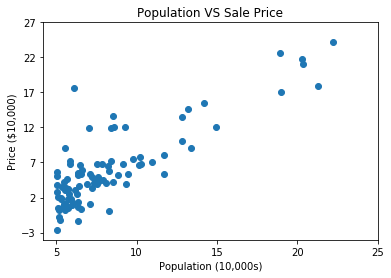

In [3]:
plt.scatter(data.Population,data.Price);
plt.xticks(np.arange(5,30,5));
plt.yticks(np.arange(-3,30,5));
plt.title("Population VS Sale Price");
plt.xlabel("Population (10,000s)");
plt.ylabel("Price ($10,000)");

### Initializing our Input features/X and parametres/Theta.

In [4]:
X=data["Population"].to_numpy() ### saving x as numpy array so that we can use it in calculation using numpy
X=np.append(np.ones((len(X),1)),X.reshape(len(X),1),axis=1)#reshaping it and adding X0=1

In [5]:
y=data["Price"].to_numpy() ### saving x as numpy array so that we can use it in calculation using numpy
y=y.reshape(len(y),1) #reshaping it in (97,1),97 rows and 1 column 

In [6]:
theta=np.zeros((2,1)) #intializing theta with 0 values, shape of 2 by 1

In [7]:
theta.shape

(2, 1)

### Defining Cost and gradient Descent Function 

In [8]:
def hyp_fn(X,theta):
    """
    Returns the predictions using input feature and parameters(Theta).
    """
    return np.dot(X,theta)

def j_theta(X,theta,y):
    """
    Calculate the mean squared error between h(x) and y.
    """
    m=len(y)
    predictions=hyp_fn(X,theta)
    squared_error=np.square(predictions-y)
    return 1/(2*m) * np.sum(squared_error)

def gradient_descent(n_iters,learn_rate,X,y,theta):
    """
    Take number of iters and learning rate and select parameters to minimize the cost function.
    """
    m=len(y)
    j_dict=[]
    for i in range(n_iters):
        predictions=hyp_fn(X,theta)
        error=predictions-y
        slope=1/m * np.dot(X.transpose(),error) 
        theta=theta-(learn_rate*slope)
        j_dict.append(j_theta(X,theta,y))
    return theta,j_dict
    

### Visualizing the J(theta) and model on data set:

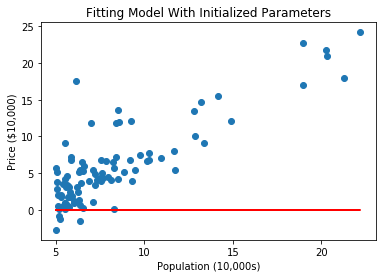

In [9]:
#visualize model when our theta values were zero
plt.scatter(data.Population,data.Price);
plt.xticks(np.arange(5,30,step=5));
plt.yticks(np.arange(-5,30,step=5));
plt.title("Fitting Model With Initialized Parameters");
plt.xlabel("Population (10,000s)");
plt.ylabel("Price ($10,000)");
plt.plot(data.Population,[x for x in hyp_fn(X,theta)],color="r");

In [10]:
theta,j_dict=gradient_descent(1400,0.01,X,y,theta)

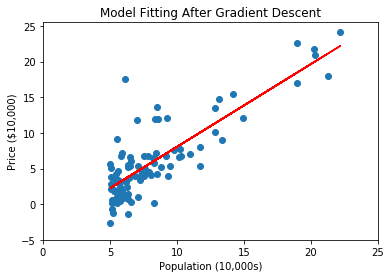

In [11]:
#visualize model when our theta values were zero
plt.scatter(data.Population,data.Price);
plt.plot(data.Population,[x for x in hyp_fn(X,theta)],color="r");
plt.xticks(np.arange(0,30,5));
plt.yticks(np.arange(-5,30,5));
plt.title("Model Fitting After Gradient Descent");
plt.xlabel("Population (10,000s)");
plt.ylabel("Price ($10,000)");

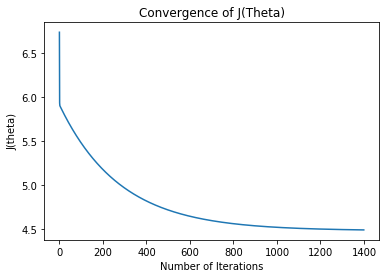

In [12]:
#Visualizing the J(theta)/cost function and see how it converges.
plt.plot(j_dict);
plt.xlabel("Number of Iterations");
plt.ylabel("J(theta)");
plt.title("Convergence of J(Theta)");

Now our hypothesis function looks like this:

In [13]:
hyp_function=print(f"h(x) = {theta[0,0]:0.2f} + {theta[1,0]:.2f}X")

h(x) = -3.58 + 1.16X


### Making predictions from our Model:
Lets assume that we have house size=32 sq feet, we use our gradient descent choosen parameters to predict the house price.

In [33]:
def predict(x,theta):
    """
    take a new input feature and using h(x) it predicts y.
    """
    x=np.append(np.ones(1),x)
    predictions=np.dot(theta.T,x)
    print(f"Price of house in Population of area {x[1]*10000:.0f} is {predictions[0]*10000:.2f}$.")

In [34]:
predict(4,theta)

Price of house in Population of area 40000 is 10665.57$.
